In [1]:
pip list | grep matplotlib

matplotlib                    3.4.3
matplotlib-inline             0.1.3
matplotlib-venn               0.11.6
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip list | grep seaborn

seaborn                       0.11.2
Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


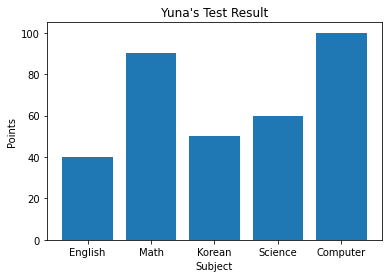

In [3]:
# 모듈 import
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure() # 도화지(그래프) 객체 생성 (얘만 쓰면 화면에 그림은 안그려짐)
ax1 = fig.add_subplot(1,1,1) #figure()객체에 add_subplot 메서드를 이용해 축을 그려준다.
# (1,1,1) = nrows, ncols, index

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

# 보여주기
plt.savefig('./barplot.png')  # 그래프를 이미지로 출력
plt.show()                    # 그래프를 화면으로 출력

# IPython 매직 명령어 정리
- https://studymake.tistory.com/601

# matpltlib 공식문서
- https://matplotlib.org/stable/api/index.html

# figure() 메서드 공식 문서
- https://matplotlib.org/stable/api/figure_api.html?highlight=figure#module-matplotlib.figure

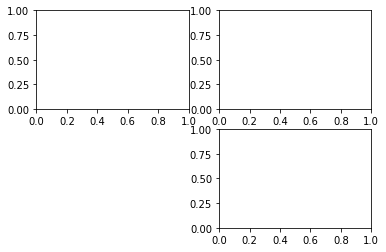

In [6]:
# 그래프 예시
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,4)

# 세 번째 인자는 아래 그림처럼 각각의 그래프가 그려지는 좌표 의미. 
# 2, 2는 2행 2열로 총 4개의 그래프를 그릴 수 있다는 뜻이며 마지막 인자로 위치 지정 가능

# 질문

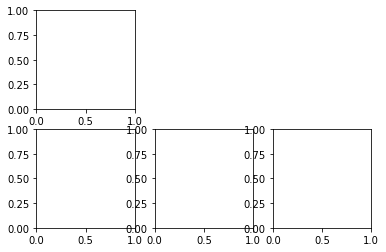

In [36]:
# Q. 아래와 같은 그래프를 만드는 코드를 작성해보세요!
# fig뒤 숫자 일치시켜줘야함!!

fig2 = plt.figure()

ax1 = fig2.add_subplot(2,3,1)
ax2 = fig2.add_subplot(2,3,4)
ax3 = fig2.add_subplot(2,3,5)
ax4 = fig2.add_subplot(2,3,6)


# 그래프 그리는 순서
- fig = plt.figure(): figure 객체를 선언해 '도화지를 펼쳐'줍니다.
- ax1 = fig.add_subplot(1,1,1): 축을 그립니다.
- ax1.bar(x, y) 축 안에 어떤 그래프를 그릴지 메서드를 선택한 다음, 인자로 데이터를 넣어줍니다.
- 그래프 타이틀 축의 레이블 등을 plt의 여러 메서드 grid, xlabel, ylabel 을 이용해서 추가해 주고
- plt.savefig 메서드를 이용해 저장해줍니다.

Text(0.5, 1.0, "Yuna's Test Result")

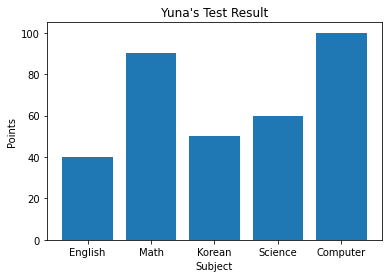

In [15]:
# 그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject,points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

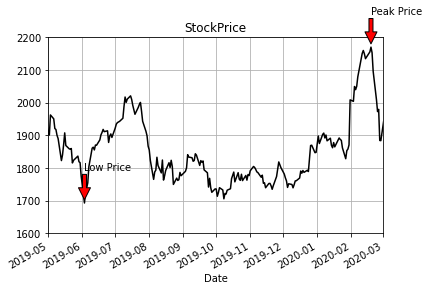

In [16]:
from datetime import datetime
import pandas as pd
import os

# 그래프 데이터 
csv_path = os.getenv("HOME") + "/aiffel/data_visualization/data/AMZN.csv"
data = pd.read_csv(csv_path, index_col=0, parse_dates=True)
price = data['Close']

# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600, 2200])
plt.xlim(['2019-05-01', '2020-03-01'])

# 주석달기
important_data = [(datetime(2019, 6, 3), "Low Price"), (datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10), # 주석을 달 좌표(x,y)
                xytext=(d, price.asof(d)+100), # 주석 텍스트가 위치할 좌표(x,y)
                arrowprops=dict(facecolor='red')) # 화살표 추가 및 색 설정

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

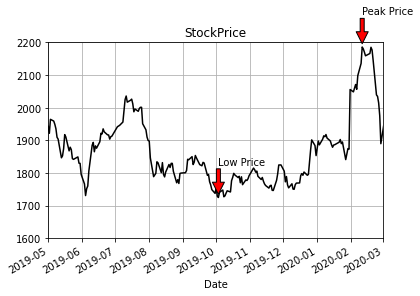

In [17]:
# Q. 날짜별 종가(Close)가 아닌 최고가(High) 데이터를 이용해서 위와 같은 그래프를 그려보세요!
# 그래프 데이터 
csv_path = os.getenv("HOME") + "/aiffel/data_visualization/data/AMZN.csv"
data = pd.read_csv(csv_path, index_col=0, parse_dates=True)
price = data['High']

# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600, 2200])
plt.xlim(['2019-05-01', '2020-03-01'])

# 날짜 정보를 python datetime 자료형으로 변환
min_date = price.idxmin().to_pydatetime()
max_date = price.idxmax().to_pydatetime()

# 주석달기
important_data = [(min_date, "Low Price"), (max_date, "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10),
                xytext=(d, price.asof(d)+100),
                arrowprops=dict(facecolor='red'))

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

In [ ]:
# 앞에서 figure() 객체를 생성하고 add_subplot()으로 서브플롯을 생성한 다음 plot을 그림
# 이 2 과정 생략 가능
# plt.plot() 함수로 그래프를 그리면 matplotlib은 가장 최근의 figure 객체와 그 서브플롯을 그림
# 만약 서브플롯이 없으면 서브플롯 하나 생성

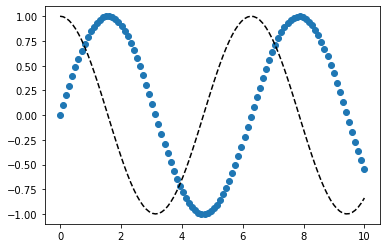

In [18]:
import numpy as np

# 0에서 10까지 균등한 간격으로 100개의 숫자를 만들라는 뜻입니다.
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x), '--', color='black') 
plt.show()

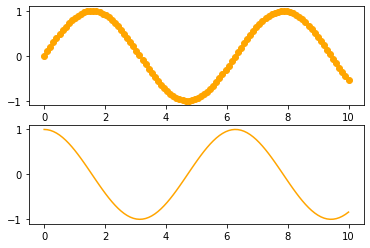

In [19]:
x = np.linspace(0, 10, 100)

plt.subplot(2,1,1)
plt.plot(x, np.sin(x), 'o', color='orange')

plt.subplot(2,1,2)
plt.plot(x, np.cos(x), 'orange') 
plt.show()

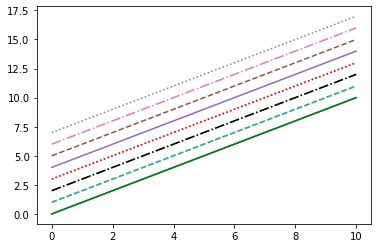

In [20]:
# linestyle, marker 옵션

x = np.linspace(0, 10, 100) 

plt.plot(x, x + 0, linestyle='solid') 
plt.plot(x, x + 1, linestyle='dashed') 
plt.plot(x, x + 2, linestyle='dashdot') 
plt.plot(x, x + 3, linestyle='dotted')
plt.plot(x, x + 0, '-g') # solid green 
plt.plot(x, x + 1, '--c') # dashed cyan 
plt.plot(x, x + 2, '-.k') # dashdot black 
plt.plot(x, x + 3, ':r'); # dotted red
plt.plot(x, x + 4, linestyle='-') # solid 
plt.plot(x, x + 5, linestyle='--') # dashed 
plt.plot(x, x + 6, linestyle='-.') # dashdot 
plt.plot(x, x + 7, linestyle=':'); # dotted

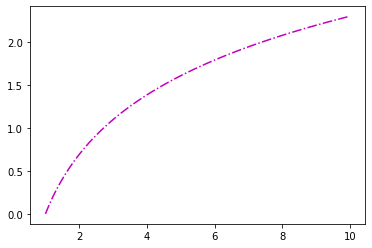

In [21]:
# Q. y=log(x)의 그래프를 그려봅시다.
# 라인 스타일은 dashdot, 색상은 'm'(magenta)으로 지정해주세요!
x = np.linspace(1, 10, 100)
y = np.log(x)

plt.plot(x, y, '-.m')
plt.show()

# pandas.plot 메서드 인자
- label: 그래프의 범례 이름
- ax: 그래프를 그릴 matplotlib의 서브플롯 객체
- style: matplotlib에 전달할 'ko--'같은 스타일의 문자열
- alpha: 투명도 (0 ~1)
- kind: 그래프의 종류: line, bar, barh, kde
- logy: Y축에 대한 로그 스케일
- use_index: 객체의 색인을 눈금 이름으로 사용할지의 여부
- rot: 눈금 이름을 로테이션(0 ~ 360)
- xticks, yticks: x축, y축으로 사용할 값
- xlim, ylim: x축, y축 한계
- grid: 축의 그리드 표시할지 여부

# pandas의 data가 DataFrame 일 때 plot 메서드 인자
- subplots: 각 DataFrame의 칼럼(column)을 독립된 서브플롯에 그립니다.
- sharex: subplots=True면 같은 X축을 공유하고 축의 범위와 눈금을 연결합니다.
- sharey: subplots=True면 같은 Y축을 공유합니다.
- figsize: 그래프의 크기를 지정합니다. (튜플)
- title: 그래프의 제목을 지정합니다. (문자열)
- sort_columns: 칼럼을 알파벳 순서로 그립니다.

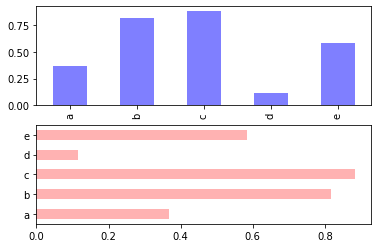

In [31]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(5), index=list('abcde'))
data.plot(kind='bar', ax=axes[0], color='blue', alpha=0.5)
data.plot(kind='barh', ax=axes[1], color='red', alpha=0.3)
plt.show()

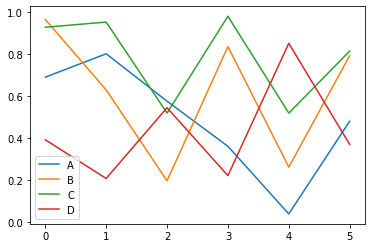

In [32]:
# 선그래프
df = pd.DataFrame(np.random.rand(6,4), columns=pd.Index(['A','B','C','D']))
df.plot(kind='line')
plt.show()

# seaborn의 load_dataset() 메서드 활용
- https://github.com/mwaskom/seaborn-data

In [37]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")

# 종업원이 tip을 얼마나 받았는지에 대한 데이터
# https://github.com/mwaskom/seaborn-data/blob/master/tips.csv

In [38]:
# EDA
# dataframe의 처음 다섯 줄을 보여줍니다.
df = pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
# dataframe의 shape(row, column의 개수)
df.shape

(244, 7)

In [40]:
# 데이터의 통계량 정보를 보여줍니다. (평균, 표준편차, 사분위수 등)
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [41]:
# 각 column의 정보를 보여줍니다. (데이터 크기와 자료형 등)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [42]:
# 범주형 데이터들의 카테고리별 개수

# 'sex' 변수의 카테고리별 개수
print(df['sex'].value_counts())
print("===========================")

# 'time' 변수의 카테고리별 개수
print(df['time'].value_counts())
print("===========================")

# 'smoker' 변수의 카테고리별 개수
print(df['smoker'].value_counts())
print("===========================")

# 'day' 변수의 카테고리별 개수
print(df['day'].value_counts())
print("===========================")

# 'size' 변수의 카테고리별 개수
print(df['size'].value_counts())
print("===========================")

Male      157
Female     87
Name: sex, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64


# 범주형 데이터의 시각화
- 주로 막대그래프 사용하여 수치 요약
- 가로/세로/누적/그룹화


In [43]:
# matplotlib에 데이터를 인자로 넣기 위해선 pandas 데이터를 바로 이용할 수는 없음
# 데이터를 x에 series 또는 list, y에 list 형태로 각각 나눠주어야 합니다.

In [44]:
grouped = df['tip'].groupby(df['sex'])

In [47]:
# 성별에 따른 팁의 평균
grouped.mean() 

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [48]:
# 성별에 따른 데이터 량(팁 횟수)
grouped.size() 

sex
Male      157
Female     87
Name: tip, dtype: int64

In [49]:
# 성별에 따른 팁 액수의 평균을 막대그래프로 나타내기
import numpy as np
sex = dict(grouped.mean()) #평균 데이터를 딕셔너리 형태로 바꿔줍니다.
sex

{'Male': 3.0896178343949043, 'Female': 2.833448275862069}

In [50]:
x = list(sex.keys())  
x

['Male', 'Female']

In [51]:
y = list(sex.values())
y

[3.0896178343949043, 2.833448275862069]

Text(0.5, 1.0, 'Tip by Sex')

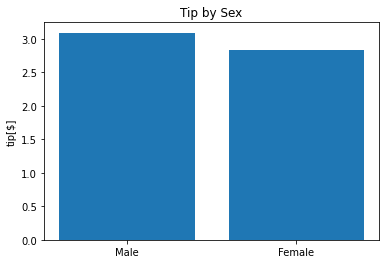

In [52]:
import matplotlib.pyplot as plt

plt.bar(x = x, height = y)
plt.ylabel('tip[$]')
plt.title('Tip by Sex')

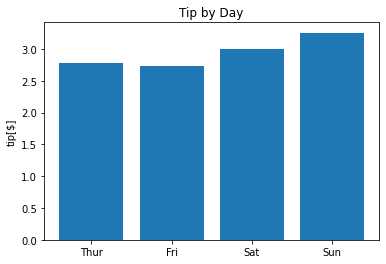

In [53]:
# Q. 요일(day)에 따른 평균 tip의 그래프를 그려보세요.

grouped_day = df['tip'].groupby(df['day'])

day = dict(grouped_day.mean())

x = list(day.keys())
y = list(day.values())

plt.bar(x=x, height = y)
plt.ylabel('tip[$]')
plt.title('Tip by Day')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='tip'>

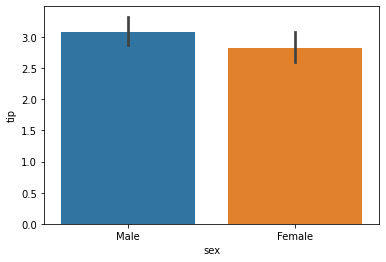

In [54]:
# seaborn으로 더 쉽게 그래프 확인
sns.barplot(data=df, x='sex', y='tip')

Text(0.5, 1.0, 'Tip by sex')

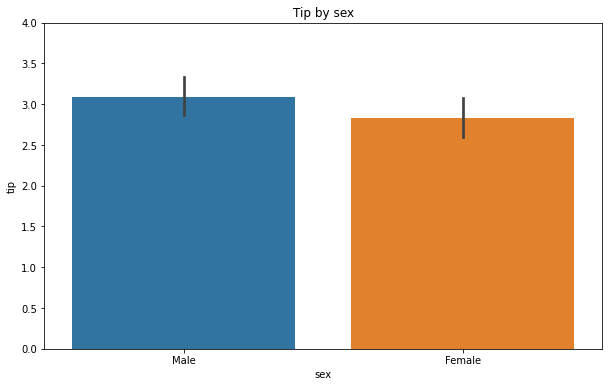

In [55]:
plt.figure(figsize=(10,6)) # 도화지 사이즈를 정합니다.
sns.barplot(data=df, x='sex', y='tip')
plt.ylim(0, 4) # y값의 범위를 정합니다.
plt.title('Tip by sex') # 그래프 제목을 정합니다.

Text(0.5, 1.0, 'Tip by day')

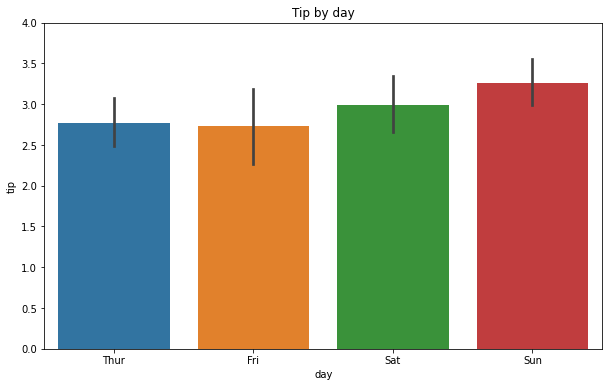

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day', y='tip')
plt.ylim(0, 4)
plt.title('Tip by day')

<AxesSubplot:xlabel='day', ylabel='tip'>

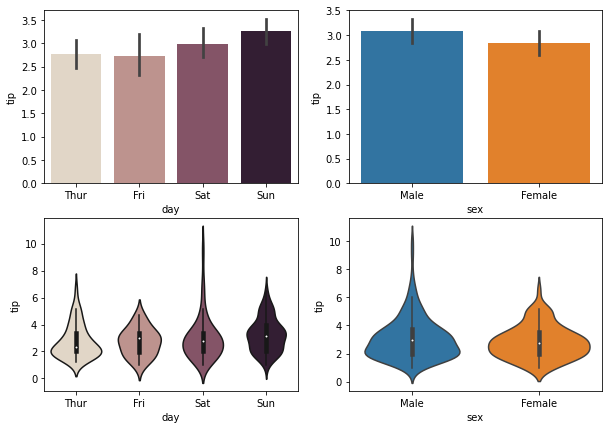

In [57]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x='day', y='tip', palette="ch:.25")

ax2 = fig.add_subplot(2,2,2)
sns.barplot(data=df, x='sex', y='tip')

ax3 = fig.add_subplot(2,2,4)
sns.violinplot(data=df, x='sex', y='tip')

ax4 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x='day', y='tip', palette="ch:.25")

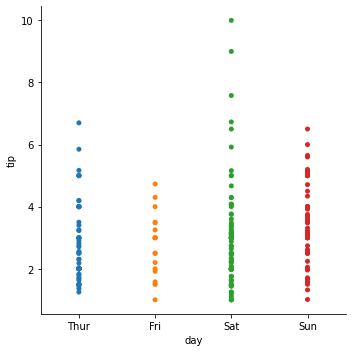

In [58]:
sns.catplot(x="day", y="tip", jitter=False, data=tips)

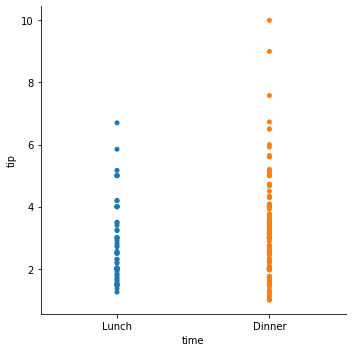

In [59]:
# Q. 시간대(time)에 따른 tips의 그래프를 catplot으로 표현해보세요!

sns.catplot(x='time', y='tip', jitter=False, data=tips)

# 수치형 데이터의 시각화
- 주로 산점도 혹은 선그래프로 표현

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

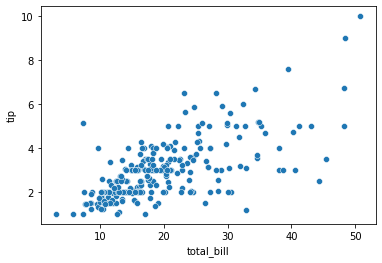

In [60]:
# 산점도
sns.scatterplot(data=df, x='total_bill', y='tip', palette="ch:r=-.2,d=.3_r")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

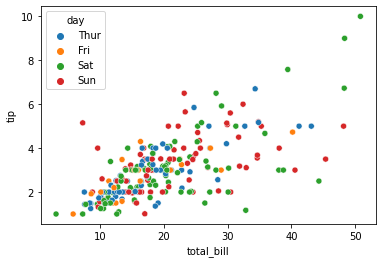

In [61]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='day')

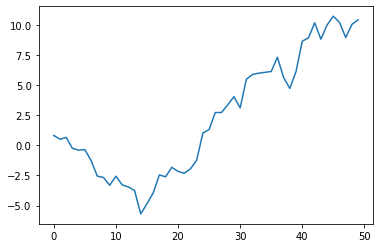

In [62]:
# np.random.randn 함수는 표준 정규분포에서 난수를 생성하는 함수입니다.
# cumsum()은 누적합을 구하는 함수입니다.
plt.plot(np.random.randn(50).cumsum())
plt.show()

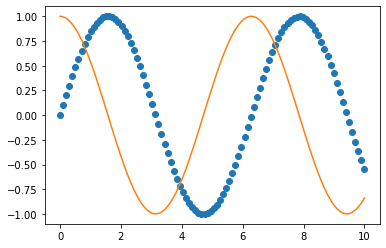

In [63]:
x = np.linspace(0, 10, 100) 
plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x)) 
plt.show()

<AxesSubplot:>

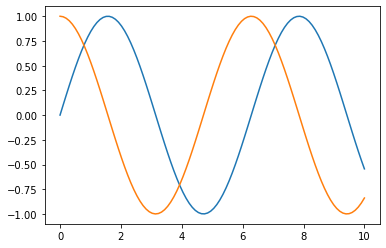

In [64]:
sns.lineplot(x=x, y=np.sin(x))
sns.lineplot(x=x, y=np.cos(x))

# 히스토그램
- 도수분포표를 그래프로 나타낸 것
- 가로축: 계급, 변수의 구간, bin(or bucket)
- 세로축; 도수, 빈도수, frequency
- 전체 총량: n

In [65]:
# 히스토그램 만들기 실습
# x1은 평균은 100이고 표준편차는 15인 정규분포를 따릅니다.
# x2는 평균은 130이고 표준편차는 15인 정규분포를 따릅니다.
# 도수를 50개의 구간으로 표시하며, 확률 밀도가 아닌 빈도로 표기합니다.

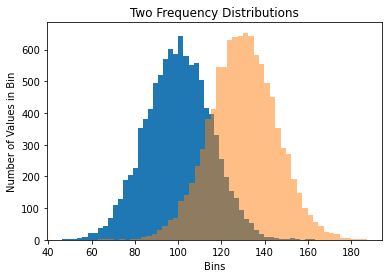

In [66]:
#그래프 데이터
mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
patches = ax1.hist(x1, bins=50, density=False)  # bins는 x값을 총 50개 구간으로 나눈다는 뜻입니다.
patches = ax1.hist(x2, bins=50, density=False, alpha=0.5)
ax1.xaxis.set_ticks_position('bottom')  # x축의 눈금을 아래 표시 
ax1.yaxis.set_ticks_position('left')  # y축의 눈금을 왼쪽에 표시

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')

# 보여주기
plt.show()

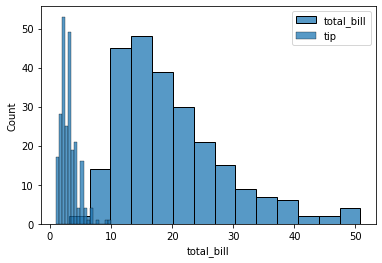

In [67]:
# tips 데이터의 total_bill과 tips에 대해 히스토그램 만들기
sns.histplot(df['total_bill'], label="total_bill")

# legend()를 이용하여 label을 표시해줍니다.
sns.histplot(df['tip'], label="tip").legend()

In [69]:
# 전체 결제 금액 대비 팁의 비율 구하기
# 컬럼 데이터 재확인

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [70]:
df['tip']/df['total_bill']

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Length: 244, dtype: float64

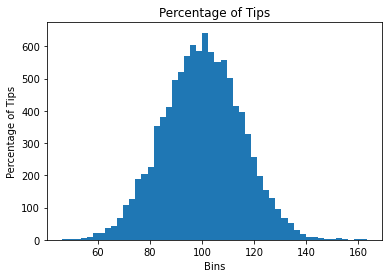

In [71]:
# Q. pyplot을 이용해서 그래프 그려보기
# bin의 개수는 50개로 지정해주세요.
df['tip_pct'] = df['tip']/df['total_bill']

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
patches = ax1.hist(x1, bins=50, density=False)  # bins는 x값을 총 50개 구간으로 나눈다는 뜻입니다.
ax1.xaxis.set_ticks_position('bottom')  # x축의 눈금을 아래 표시 
ax1.yaxis.set_ticks_position('left')  # y축의 눈금을 왼쪽에 표시

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Percentage of Tips')
ax1.set_title('Percentage of Tips')

# 보여주기
plt.show()

<AxesSubplot:xlabel='tip_pct', ylabel='Count'>

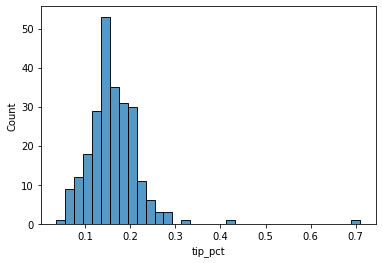

In [72]:
# seaborn으로도 그려보기

# tips 데이터의 total_bill과 tips에 대해 히스토그램 만들기
sns.histplot(df['tip_pct'], label="tip_pct").legend()

<AxesSubplot:ylabel='Density'>

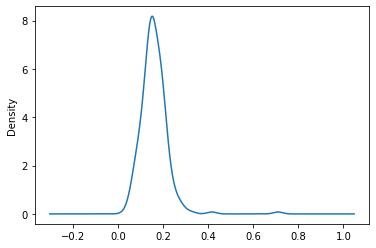

In [74]:
# 밀도그래프 (kind='kde'로 그려보기)

# 밀도그래프: 연속된 확률 분포 나타냄
# 일반적으로 kernels메서드를 섞어서 그림
# 하단 밀도 그래프는 KDE(Kernel Density Estimate) 커널 밀도 추정 그래프
# KDE 설명 참고 : https://darkpgmr.tistory.com/147#:~:text=Kernel%20Density%20Estimation%20(%EC%BB%A4%EB%84%90%20%EB%B0%80%EB%8F%84%20%EC%B6%94%EC%A0%95)%20%EB%B0%A9%EB%B2%95%EC%9D%80%20non%2D,%EC%9D%84%20%EA%B0%9C%EC%84%A0%ED%95%9C%20%EB%B0%A9%EB%B2%95%EC%9D%B4%EB%8B%A4.

df['tip_pct'].plot(kind='kde')

# 시계열 데이터 시각화
- 

In [75]:
csv_path = os.getenv("HOME") + "/aiffel/data_visualization/data/flights.csv"
data = pd.read_csv(csv_path)
flights = pd.DataFrame(data)
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


<AxesSubplot:xlabel='year', ylabel='passengers'>

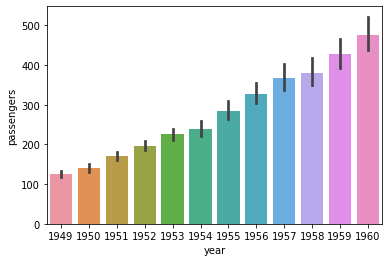

In [76]:
# seaborn barplot
sns.barplot(data=flights, x='year', y='passengers')

<AxesSubplot:xlabel='year', ylabel='passengers'>

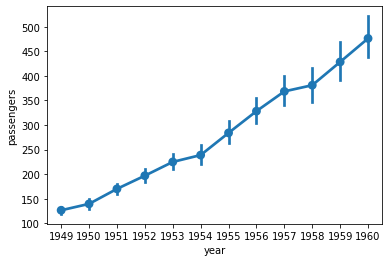

In [78]:
sns.pointplot(data=flights, x='year', y='passengers')

<AxesSubplot:xlabel='year', ylabel='passengers'>

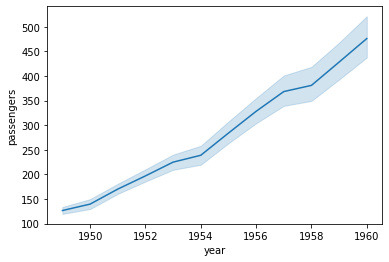

In [79]:
sns.lineplot(data=flights, x='year', y='passengers')

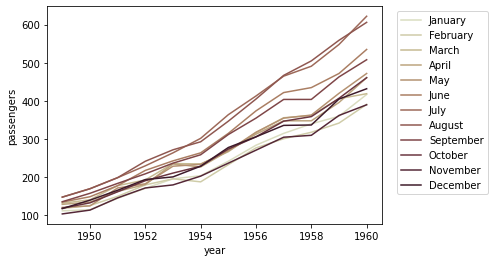

In [80]:
# 달별로 나누어 보기 위해 hue인자에 'month' 할당
sns.lineplot(data=flights, x='year', y='passengers', hue='month', palette='ch:.50')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기

<AxesSubplot:xlabel='passengers', ylabel='Count'>

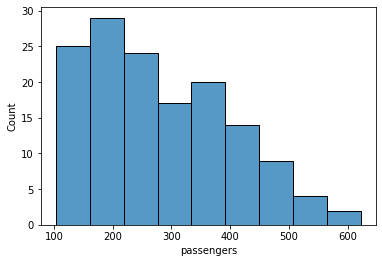

In [90]:
sns.histplot(flights['passengers'])

# Heatmap
- 방대한 양의 데이터와 현상을 수치에 따른 색상으로 나타내는 것
- 데이터 차원에 대한 제한은 없으나 모두 2차원으로 시각화하여 표현

### 잠깐만! pivot
Heatmap을 그리기 위해 데이터를 pivot 해야 하는 경우가 있습니다.
pivot이란 어떤 축, 점을 기준으로 바꾸다란 뜻입니다. 데이터 표를 재배치할 때도 pivot이라는 단어를 사용합니다. (엑셀, Database에도 등장하는 용어입니다.)

In [91]:
# 연도와 달에 대해 탑승객 수를 heatmap으로 표현
pivot = flights.pivot(index='year', columns='month', values='passengers')
pivot

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


<AxesSubplot:xlabel='month', ylabel='year'>

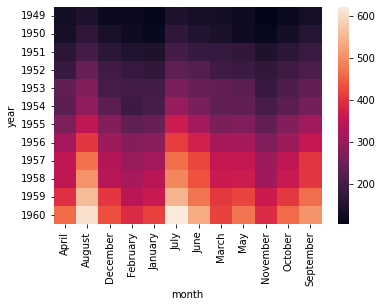

In [92]:
sns.heatmap(pivot)

<AxesSubplot:xlabel='month', ylabel='year'>

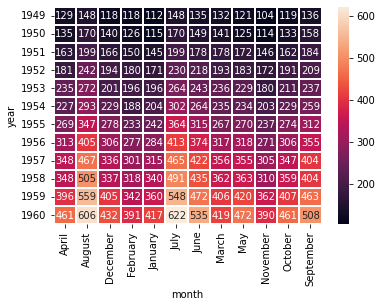

In [94]:
sns.heatmap(pivot, linewidths=.2, annot=True, fmt="d")

# 각 인자들의 의미
# heatmap cell 사이의 간격을 0.2로 지정합니다. (linewidths=.2)
# heatmap cell 안에 데이터 값을 넣고 (annot=True)
# 데이터 값의 형식을 정수로 지정합니다. (fmt="d")

<AxesSubplot:xlabel='month', ylabel='year'>

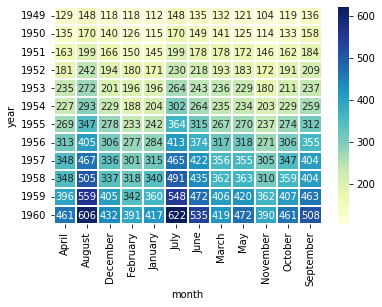

In [95]:
sns.heatmap(pivot, linewidths=.2, annot=True, fmt="d", cmap='YlGnBu')


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

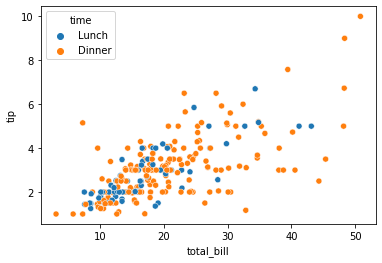

In [109]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time')

In [99]:
# seaborn jointplot 문서 : https://seaborn.pydata.org/generated/seaborn.jointplot.html


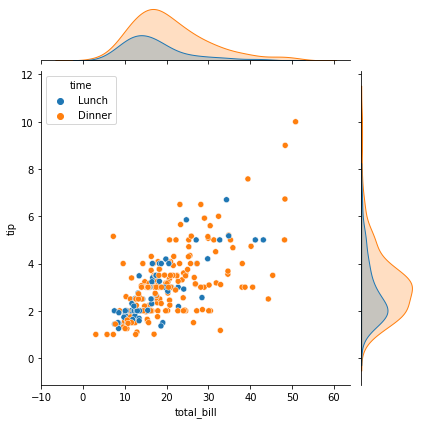

In [110]:
sns.jointplot(data=tips, x="total_bill", y="tip", hue="time", kind="scatter")

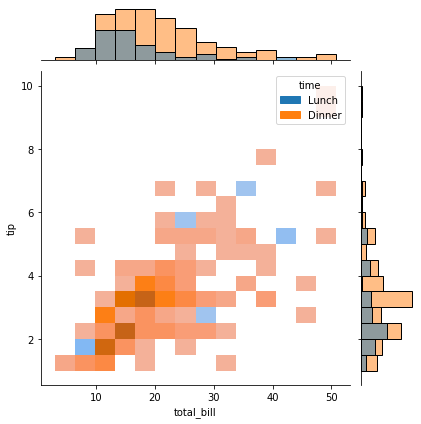

In [111]:
sns.jointplot(data=tips, x="total_bill", y="tip", hue="time", kind="hist")

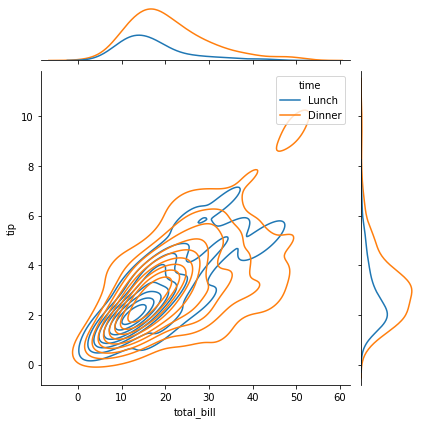

In [113]:
sns.jointplot(data=tips, x="total_bill", y="tip", hue="time", kind="kde")

In [ ]:
['scatter', 'hist', 'hex', 'kde', 'reg', 'resid'], but species was passed.`
